Write a program to construct a bayesian network considering medical data. Use this model to demonstrate the diagnosis of heat paients using standard heart disease dataset

In [95]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as py
import warnings
warnings.filterwarnings('ignore')

![](2023-04-03-10-01-40.png)

In [96]:
# reading the csv file
df = pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [97]:
# getting the info about the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset contains no null values

In [98]:
# getting the labels that we have in our dataset
df['target'].unique()

array([0, 1], dtype=int64)

In [99]:
# getting the dtypes of all the features 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [100]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [101]:
# building the bayesian model
model=BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','target'),('fbs','target'),('target','restecg'),('target','thalach'),('target','chol')])


In [102]:
#Learning CPDs using Maximum Likelihood Estimators
model.fit(df,estimator=MaximumLikelihoodEstimator)

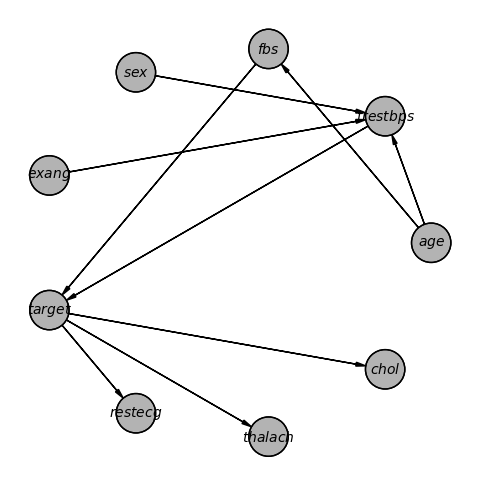

In [103]:
model.to_daft('circular',pgm_params={'grid_unit': 5}).render()
py.show()

In [104]:
# Inferencing with Bayesian Network
infer = VariableElimination(model)

In [105]:
#computing the Probability of HeartDisease given Age
print('\n 1. Probability of Heart Disease given trest bps=145')
q= infer.query(variables=['target'],evidence={'trestbps':145})
print(q)



 1. Probability of Heart Disease given trest bps=145
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8830 |
+-----------+---------------+
| target(1) |        0.1170 |
+-----------+---------------+


In [106]:
#computing the Probability of HeartDisease given cholesterol
print('\n 2. Probability of HeartDisease given cholesterol=212')
q= infer.query(variables=['target'],evidence={'chol':212})
print(q)


 2. Probability of HeartDisease given cholesterol=212
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8282 |
+-----------+---------------+
| target(1) |        0.1718 |
+-----------+---------------+
